<a href="https://colab.research.google.com/github/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/blob/master/LR_vs_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def get_dataset(N = 100_000, seed=1, means_1 = np.array([0,0]), means_2 = np.array([2, 2]), cov_mat = np.array([[1,0.75], [0.75,1]])):
  np.random.seed(seed)
  
  x1 = np.random.multivariate_normal(means_1, cov_mat, N)
  x2 = np.array(means_2) + x1
  X = np.vstack([x1, x2])
  y = np.hstack([[0]*len(x1), [1]*len(x2)]) 
  return X,y

In [0]:
X, y = get_dataset(N=100)

In [141]:
X.shape, y.shape

((200, 2), (200,))

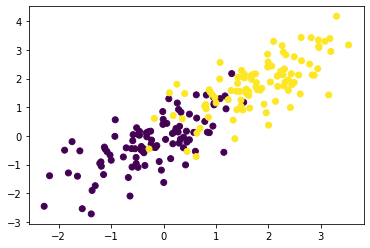

In [142]:
plt.scatter(*X.T, c=y)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
Ns = np.logspace(1, 5, 30)

In [169]:
clf_LDA.coef_[0,0]

1.1443765428740922

In [170]:
LDA_results_C = []
LR_results_C = []
LDA_results_W1 = []
LR_results_W1 = []
LDA_results_W2 = []
LR_results_W2 = []
for i, N in enumerate(Ns):
  print(i, N)
  clf_LR = LogisticRegression()
  clf_LDA = LinearDiscriminantAnalysis()
  X, y = get_dataset(int(N))
  clf_LR.fit(X,y)
  clf_LDA.fit(X,y)
  LDA_results_C.append(clf_LDA.intercept_)
  LR_results_C.append(clf_LR.intercept_)
  LDA_results_W1.append(clf_LDA.coef_[0,0])
  LR_results_W1.append(clf_LR.coef_[0,0])
  LDA_results_W2.append(clf_LDA.coef_[0,1])
  LR_results_W2.append(clf_LR.coef_[0,1])

0 10.0
1 13.73823795883263
2 18.873918221350976
3 25.92943797404667
4 35.62247890262442
5 48.93900918477494
6 67.23357536499334
7 92.36708571873861
8 126.89610031679221
9 174.33288221999874
10 239.5026619987486
11 329.03445623126674
12 452.03536563602404
13 621.0169418915616
14 853.1678524172805
15 1172.1022975334806
16 1610.2620275609393
17 2212.216291070448
18 3039.195382313198
19 4175.3189365604
20 5736.152510448682
21 7880.462815669913
22 10826.36733874054
23 14873.521072935118
24 20433.597178569395
25 28072.162039411756
26 38566.20421163472
27 52983.16906283702
28 72789.53843983146
29 100000.0


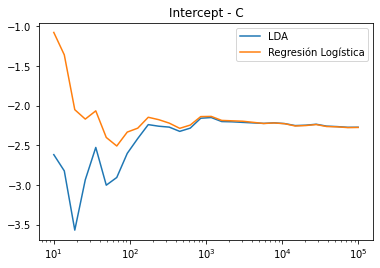

In [176]:
plt.title('Intercept - C')
plt.semilogx(Ns, LDA_results_C, label='LDA')
plt.semilogx(Ns, LR_results_C, label='Regresión Logística')
plt.legend()

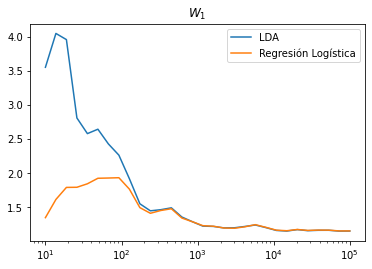

In [180]:
plt.title('$W_1$')
plt.semilogx(Ns, LDA_results_W1, label='LDA')
plt.semilogx(Ns, LR_results_W1, label='Regresión Logística')
plt.legend()

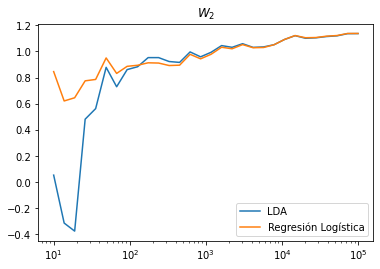

In [181]:
plt.title('$W_2$')
plt.semilogx(Ns, LDA_results_W2, label='LDA')
plt.semilogx(Ns, LR_results_W2, label='Regresión Logística')
plt.legend()

In [122]:
print(clf_LR.coef_, clf_LR.intercept_)

[[1.14887956 1.13699894]] [-2.27305868]


In [123]:
print(clf_LDA.coef_, clf_LDA.intercept_) 

[[1.14690334 1.13585015]] [-2.27031283]


In [113]:
print(clf_LDA.means_, clf_LDA.scalings_)

[[-0.08129935 -0.38380169]
 [ 1.91870065  1.61619831]] [[1.13120008]
 [0.04750612]]


In [125]:
np.linalg.inv(cov_mat).dot((means_1-means_2).reshape(2,1)) #.reshape(2,1)

array([[-1.14285714],
       [-1.14285714]])

In [132]:
-np.dot((means_1+means_2).reshape(1, 2), np.linalg.inv(cov_mat)).dot(means_1-means_2)/2

array([2.28571429])

In [73]:
clf_LDA.scalings_

array([[1.13120008],
       [0.04750612]])

In [74]:
clf_LDA.means_

array([[-0.08129935, -0.38380169],
       [ 1.91870065,  1.61619831]])